# Exploration of data

In [ ]:
!pip install pipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# imports
import pandas as pd
# import pipe
import numpy as np
import seaborn as sns
from plotnine import *

In [ ]:
file = '/content/findex_SubSahAfrica.csv'
df = pd.read_csv(file, index_col=0)
print(f'There are {df.shape[0]} entries and {df.shape[1]} features')
df.head()

There are 35000 entries and 105 features


,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,pay_onlne,pay_onlne_mobintbuy,pay_cash,pay_cash_mobintbuy
12138,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,143101339,1.909609,1,60.0,1.0,1,...,4,4,4,4.0,4,5.0,0.0,NaN,0.0,NaN
12139,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,123998301,2.075761,1,45.0,1.0,1,...,4,4,4,4.0,3,1.0,0.0,NaN,0.0,NaN
12140,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,157155643,0.785666,1,27.0,3.0,4,...,4,4,4,4.0,4,2.0,1.0,1.0,0.0,0.0
12141,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,155618899,1.450568,2,24.0,1.0,2,...,4,4,4,4.0,3,5.0,0.0,NaN,0.0,NaN
12142,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,143861320,0.461588,1,22.0,1.0,5,...,4,4,4,4.0,4,5.0,0.0,NaN,0.0,NaN


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[Text(0.5, 1.0, 'Distribution of Access to Emergency Funds')]

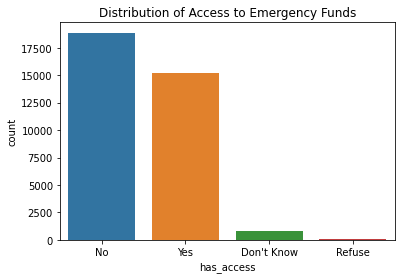

In [ ]:
# select vars of interest
df2 = df[['female', 'age', 'emp_in', 'account_fin', 'fin24', 'fin25']]
# Recode fin24 values
df2.loc[df2['fin24'] == 1, "fin24"] = 'Yes'
df2.loc[df2['fin24'] == 2, "fin24"] = 'No'
df2.loc[df2['fin24'] == 3, "fin24"] = 'Don\'t Know'
df2.loc[df2['fin24'] == 4, "fin24"] = 'Refuse'
# rename fin24 to has_access
df2.rename(columns = {'fin24': 'has_access'}, inplace = True)
df2.head()
# barplot of access to emergency funds
sns.countplot(x = 'has_access', data = df2).set(title = "Distribution of Access to Emergency Funds")

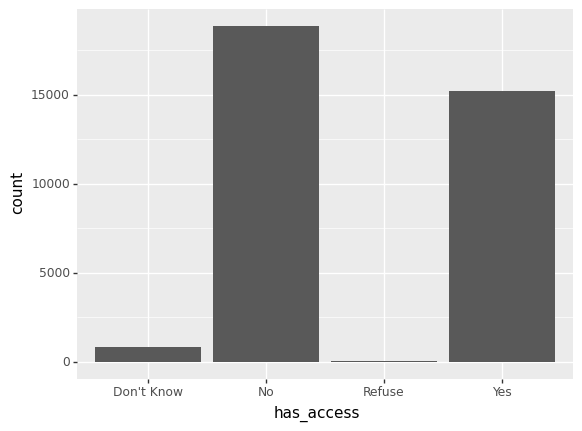

<ggplot: (8735888354245)>

In [ ]:
# plotnine version of above plot-- can't decide if this is easier or not, seems harder to customize
fig = (
    ggplot(df2, aes(x = 'has_access')) +
    geom_bar()
)

fig

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[Text(0.5, 1.0, 'Gender Distribution')]

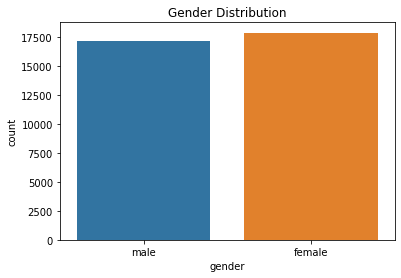

In [ ]:
df2.loc[df2['female'] == 1, "female"] = 'male'
df2.loc[df2['female'] == 2, "female"] = 'female'
df2.rename(columns = {'female': 'gender'}, inplace = True)
# barplot female versus not
sns.countplot(x = 'gender', data = df2).set(title = "Gender Distribution")

[Text(0.5, 1.0, 'Distribution of Has a Financial Account')]

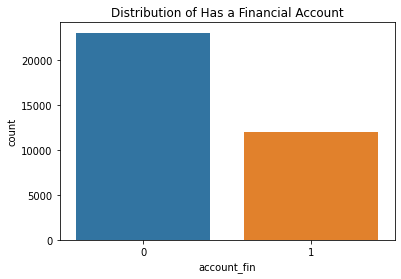

In [ ]:
# barplot of number of people who have a bank account
sns.countplot(x = 'account_fin', data = df2).set(title = "Distribution of Has a Financial Account")

[Text(0.5, 1.0, 'Distribution of Access by Gender')]

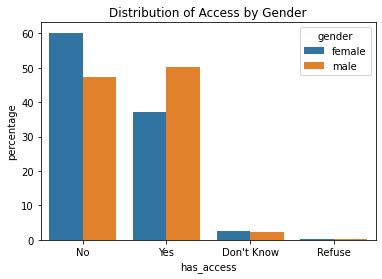

In [ ]:
# barplot of possibility of coming up with emergency funds by gender
# 1 = female, 2 = not female
# 1 = yes have access, 2 = no, 3 = don't know, 4 = refuse
gender_fin_counts = (df2.groupby(['gender'])['has_access']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
)
sns.barplot(x = "has_access", y = "percentage", hue="gender", data = gender_fin_counts).set(title = "Distribution of Access by Gender")

[Text(0.5, 1.0, 'Distribution of Has a Financial Account by Gender')]

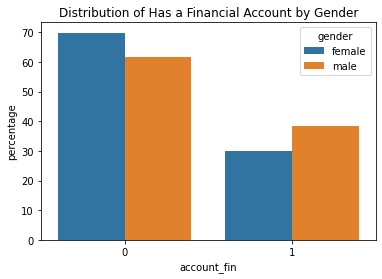

In [ ]:
gender_acc_counts = (df2.groupby(['gender'])['account_fin']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
)
sns.barplot(x = "account_fin", y = "percentage", hue="gender", data = gender_acc_counts).set(title = "Distribution of Has a Financial Account by Gender")

[Text(0.5, 1.0, 'Distribution of Whether or not in Workforce')]

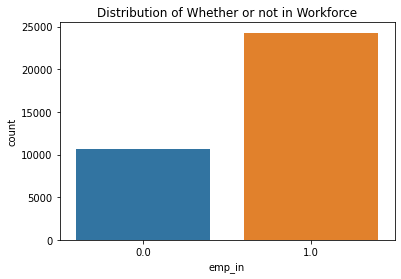

In [ ]:
# Distribution by in workforce
sns.countplot(x = 'emp_in', data = df2).set(title = "Distribution of Whether or not in Workforce")

[Text(0.5, 1.0, 'Distribution of In Workforce by Gender')]

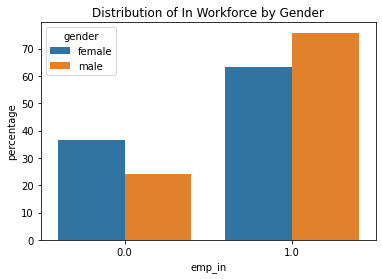

In [ ]:
# Distribution by Gender and In Workforce
gender_emp_counts = (df2.groupby(['gender'])['emp_in']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
)
sns.barplot(x = "emp_in", y = "percentage", hue="gender", data = gender_emp_counts).set(title = "Distribution of In Workforce by Gender")

Makes sense that more males are in the workforce, have a financial account, and have access to emergency funds.

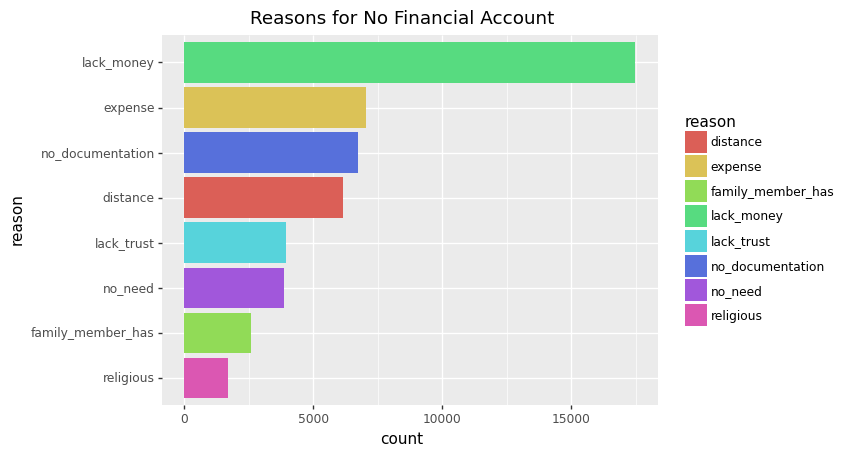

<ggplot: (8745243605689)>

In [ ]:
# reasons for no financial account
# pivot data to long format
df_long = df[['fin11a', "fin11b", "fin11c", "fin11d", "fin11e", "fin11f", "fin11g", "fin11h"]]\
.stack()\
.reset_index()
df_long.rename(columns = {'level_1':'reason', 0:'value'}, inplace = True)
df3 = df_long.query('value == 1.0') # filter to only "yes" answers for each reason
# recode reason values
df3.loc[df3['reason'] == 'fin11a', "reason"] = 'distance'
df3.loc[df3['reason'] == 'fin11b', "reason"] = 'expense'
df3.loc[df3['reason'] == 'fin11c', "reason"] = 'no_documentation'
df3.loc[df3['reason'] == 'fin11d', "reason"] = 'lack_trust'
df3.loc[df3['reason'] == 'fin11e', "reason"] = 'religious'
df3.loc[df3['reason'] == 'fin11f', "reason"] = 'lack_money'
df3.loc[df3['reason'] == 'fin11g', "reason"] = 'family_member_has'
df3.loc[df3['reason'] == 'fin11h', "reason"] = 'no_need'
df3.head()

# aggregate counts by region
reason_counts = df3.groupby('reason').agg('count').reset_index()
reason_counts.head()

# barplot of count by reason-- plotnine
ggplot(reason_counts, aes(x = 'reorder(reason, value)', y = 'value', fill = 'reason')) +\
geom_col() +\
coord_flip() +\
labs(title = "Reasons for No Financial Account", x = "reason", y = "count")